[[-0.5574131844196919], [0.1670945208197181], [-0.3575196269671206]]
[46.96039659012836, 8.124458978661838, -7.736631258769583]
0.0671842098236084


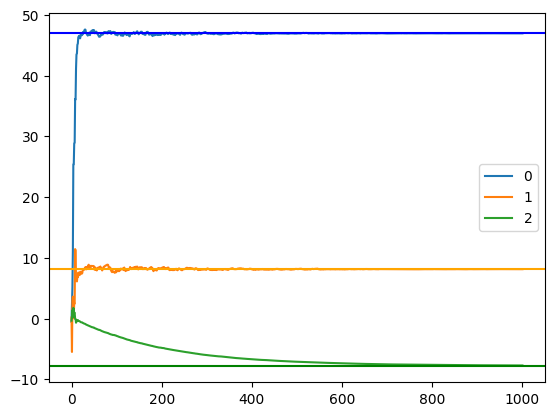

In [55]:
import numpy as np
import matplotlib as plt
from Neuron import *
import time 
import matplotlib.pyplot as plt

class Output_Layer:
    def __init__(self, input_shape, output_shape, activation_func=none):
        neuron_layer = np.array([])
        for x in range(output_shape):
            neuron_layer = np.append(neuron_layer,Perceptron(n_of_weights=input_shape, step=activation_func, activation=activation_func))
        self.neurons = neuron_layer
        
    def get_neuron(self, n):
        return self.neurons[n]
    
    def get_neurons(self):
        return self.neurons
    
    def set_neurons(self, adj_neurons):
        self.neurons = adj_neurons
    
    def forward_pass(self, X):
        output = np.array([])
        for neuron in self.neurons:
            output = np.append(output,neuron.step_pass(X))
        return output
    
    def relu(self, input):
        if input>0:
            return input
        else:
            return 0
        
    def drelu(self, input):
        if input>0:
            return 1
        else:
            return 0

    def sigmoid(self, input):
        return 1/(1+np.e**(-input))

    def dsigmoid(self, input):
        return self.sigmoid(input)*(1-self.sigmoid(input))
    
    def dactivation(self, neuron, input):
        activation = neuron.get_activation()
        if activation=='sigmoid':
            return dsigmoid(neuron.raw_pass(input))
        elif activation=='relu':
            return drelu(neuron.raw_pass(input))
        else:
            return neuron.raw_pass(input)
    
    def fit(self, X, y, learning_rate):
        weight_change = [[w] for w in self.get_neurons()[0].get_weights()]
        print(weight_change)
        error = [0]
        neurons = self.get_neurons()
        for k in range(len(X)):
            for n in neurons:
                weights = n.get_weights()[:-1]
                adj_weights = [weights[x]-(learning_rate*(self.forward_pass(X[k])-y[k])*X[k][x])[0] for x in range(len(weights))]
                adj_weights.append(n.get_weights()[-1:][0]-(learning_rate*(self.forward_pass(X[k])-y[k]))[0])
                n.change_weights(adj_weights)
                for x in range(len(adj_weights)):
                    weight_change[x].append(adj_weights[x])
            error.append(y[k]-n.step_pass(X[k]))
            self.set_neurons(neurons)
        return weight_change, error
    
    
## testing

start = time.time()

layer = Output_Layer(2, 1)

a = np.random.uniform(-100,100)
b = np.random.uniform(-100,100)
c = np.random.uniform(-100,100)

X = np.array([np.random.uniform(-10,10,2) for x in range(1000)])
y = [a*x[0]+b*x[1]+c for x in X]

change, err = layer.fit(X,y, learning_rate=0.005)

print(layer.get_neurons()[0].get_weights())

end = time.time()
print(end-start)

plt.plot(change[0],label='0')
plt.axhline(y=a, color='blue')
plt.plot(change[1],label='1')
plt.axhline(y=b, color='orange')
plt.plot(change[2],label='2')
plt.axhline(y=c, color='green')
plt.legend()